**k-Nearest Neighbors Classification**

In [0]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [0]:
df = pd.read_csv("/content/iris.csv")

In [8]:
df[[ 'SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' ,'PetalWidthCm' ]] = df[['SepalLengthCm' , 'SepalWidthCm' ,'PetalLengthCm' , 'PetalWidthCm' ]].replace(0,np.NaN)
print (df.isnull().sum())
print(df.head(5))
df.head(5)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
species          0
dtype: int64
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm species
0            5.1           3.5            1.4           0.2  setosa
1            4.9           3.0            1.4           0.2  setosa
2            4.7           3.2            1.3           0.2  setosa
3            4.6           3.1            1.5           0.2  setosa
4            5.0           3.6            1.4           0.2  setosa


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df[[ 'SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' ,'PetalWidthCm' ]] = df[['SepalLengthCm' , 'SepalWidthCm' ,'PetalLengthCm' , 'PetalWidthCm' ]].replace(0,np.NaN)
print (df.isnull().sum())
print(df.head(5))

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
species          0
dtype: int64
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm species
0            5.1           3.5            1.4           0.2  setosa
1            4.9           3.0            1.4           0.2  setosa
2            4.7           3.2            1.3           0.2  setosa
3            4.6           3.1            1.5           0.2  setosa
4            5.0           3.6            1.4           0.2  setosa


In [12]:
print(df.shape)
print(df.dtypes)
print(df.head(5))

(150, 5)
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
species           object
dtype: object
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm species
0            5.1           3.5            1.4           0.2  setosa
1            4.9           3.0            1.4           0.2  setosa
2            4.7           3.2            1.3           0.2  setosa
3            4.6           3.1            1.5           0.2  setosa
4            5.0           3.6            1.4           0.2  setosa


In [13]:
print(df.describe())
print(df.groupby('species').size())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000
species
setosa        50
versicolor    50
virginica     50
dtype: int64


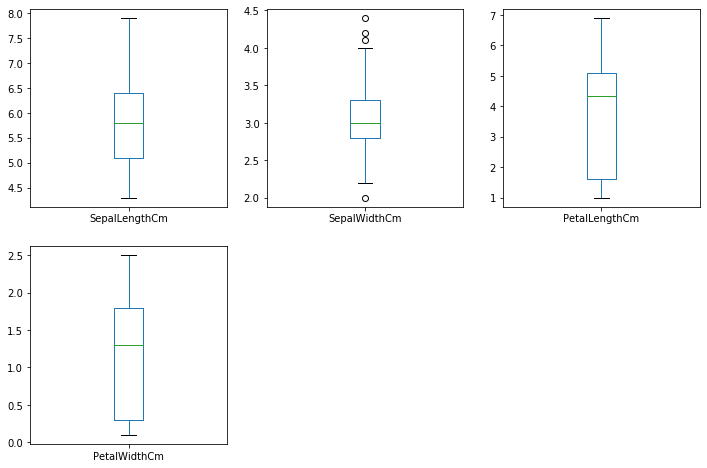

In [14]:
df.plot(kind="box", subplots = True, layout = (2,3), sharex = False, sharey = False, figsize=(12,8) )
plt.show()

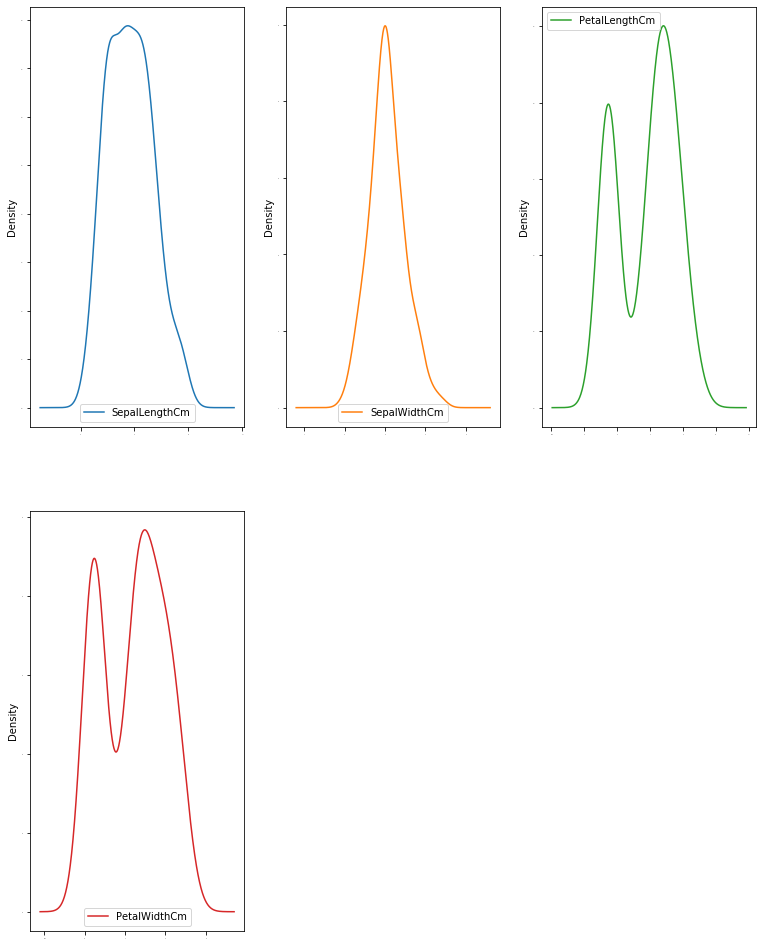

In [15]:
df.plot(kind="density", subplots = True, layout = (2,3), sharex = False, legend = True, fontsize=1, figsize=(13,17) )
plt.show()

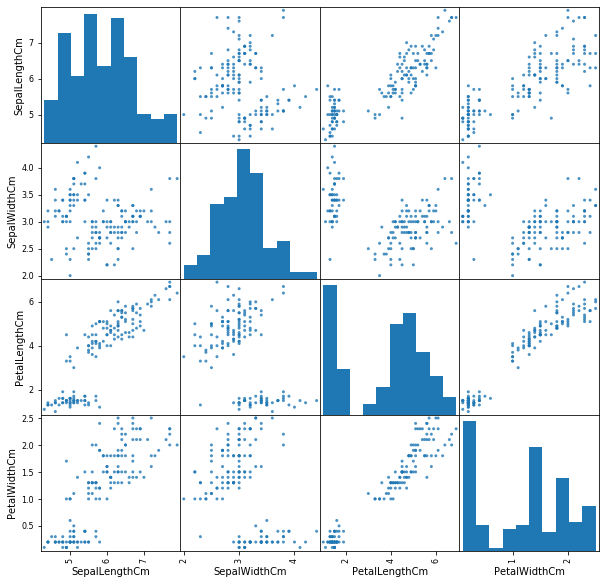

In [17]:
scatter_matrix(df, alpha=0.8, figsize=(10,10))
plt.show()

In [0]:
array = df.values
X = array[:,0:4]
Y = array[:,4]

In [0]:
test_size = 0.25
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
test_size1 = 0.33
seed1 = 7
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=test_size1,
random_state=seed1)

25:75 Split:Ploting accuracies for test and train set for values of k from 1 to 20


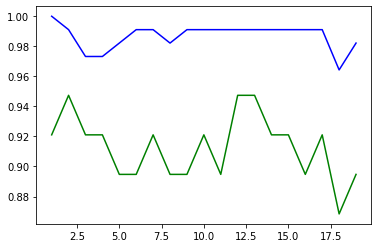

25:75 Split:Ploting difference in accuracies for test and train set for values of k from 1 to 20


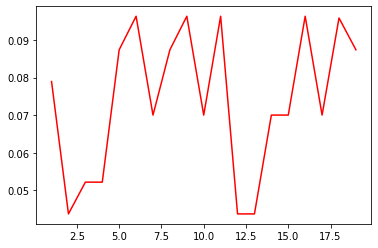

33:67 Split:Ploting accuracies for test and train set for values of k from 1 to 20


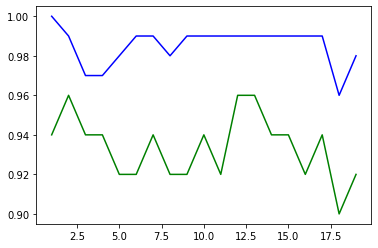

33:67 Split:Ploting difference in accuracies for test and train set for values of k from 1 to 20


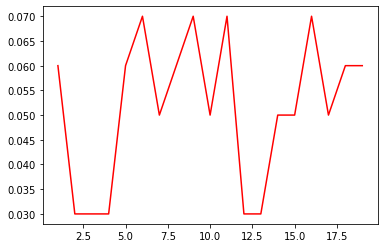

In [20]:
scores_set_train = []
scores_set_test  = []
score_diff = []
scores_set_train1 = []
scores_set_test1  = []
score_diff1 = []
for i in range(1,20):
    model = KNeighborsClassifier(i)
    model1 = KNeighborsClassifier(i)
    model.fit(X_train, Y_train)
    model1.fit(X_train1, Y_train1)
    scores_set_train.append(model.score(X_train,Y_train))
    scores_set_test.append(model.score(X_test,Y_test))
    score_diff.append(model.score(X_train,Y_train)-model.score(X_test,Y_test))
    scores_set_train1.append(model.score(X_train1,Y_train1))
    scores_set_test1.append(model.score(X_test1,Y_test1))
    score_diff1.append(model.score(X_train1,Y_train1)-model.score(X_test1,Y_test1))
print("25:75 Split:Ploting accuracies for test and train set for values of k from 1 to 20")
plt.plot(range(1,20),scores_set_train, '-b')
plt.plot(range(1,20),scores_set_test, '-g') 
plt.show()
plt.plot(range(1,20),score_diff, '-r') 
print("25:75 Split:Ploting difference in accuracies for test and train set for values of k from 1 to 20")
plt.show()
print("33:67 Split:Ploting accuracies for test and train set for values of k from 1 to 20")
plt.plot(range(1,20),scores_set_train1, '-b')
plt.plot(range(1,20),scores_set_test1, '-g') 
plt.show()
plt.plot(range(1,20),score_diff1, '-r') 
print("33:67 Split:Ploting difference in accuracies for test and train set for values of k from 1 to 20")
plt.show()

In [21]:
model = KNeighborsClassifier(2)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print("MODEL 1 \n",report)
model1 = KNeighborsClassifier(3)
model1.fit(X_train1, Y_train1)
predicted1 = model1.predict(X_test1)
report1 = classification_report(Y_test1, predicted1)
print("MODEL 2 \n",report1)

MODEL 1 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.88      1.00      0.93        14
   virginica       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

MODEL 2 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.89      0.94      0.92        18
   virginica       0.94      0.89      0.91        18

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



In [22]:
result = model.score(X_test, Y_test)
print(("Accuracy: %.3f%%") % (result*100.0))

result1 = model1.score(X_test1, Y_test1)
print(("Accuracy model1: %.3f%%") % (result1*100.0))

Accuracy: 94.737%
Accuracy model1: 94.000%


In [23]:
print("Model 1 prediction",model.predict([[5.3, 3.0, 4.5, 1.5]]))
print("Model 2 prediction",model1.predict([[5.3, 3.0, 4.5, 1.5]]))

Model 1 prediction ['versicolor']
Model 2 prediction ['versicolor']


In [24]:
n_splits = 10
seed = 7
kfold = KFold(n_splits, random_state=seed)
scoring = 'accuracy'
resultskfold = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (resultskfold.mean(), resultskfold.std()))
resultskfold1 = cross_val_score(model1, X, Y, cv=kfold, scoring=scoring)
print("Accuracy1: %.3f (%.3f)" % (resultskfold1.mean(), resultskfold1.std()))

Accuracy: 0.933 (0.079)
Accuracy1: 0.947 (0.065)



Based on ten fold cross validation the picked model is model 2 with test-train split of 33:67 and k=3.
This k value of 3 was chosen because it gave the minimum difference between the model prediction precision using test data and train data. Also for Each k using this model the diffrence range from 0.015 to 0.55 but for the other model it was from 0.01 to 0.09.
K value of 2 for this model gave 96% accuracy but the cross-validation accuracy was only 93%. But for k=3 the model performed best in cross validation.
Using this model we have a accurate prediction for the class setosa

For versicolor has precision of 89, 89% versicolor were classified correctly but 11% were missclassified. Also versicolor has recall of 94, out of total classified as versicolor, only 94% were truly versicolor
For virginica has precision of 94, 94% virginica were classified correctly but 6% were missclassified. Also virginica has recall of 89, out of total classified as virginica, only 89% were truly virginica
Total accuracy of model predictions= 94 % meaning the prediction was correct 94% of times which is a weighted harmonic mean of all the classes, precision and recall
using the 10-fold cross-validation to estimate the model / algorithm, the accuracy of this KNN model is 94.7%. It improved the model efficiency from 94 for a single sample to 94.7% using k-fold validation

Above, the model predicted the flower type of the new record as versicolor. According to the model's efficiency score received from the model evaluation using 10-told cross-validation there is 94.7% chance that this new record is an versicolor.


